# Convolutional Neural Network (CNN)

## Convolution
Imagine that you are rolling two fair dice and the outcome of each roll is a probability distribution:
$$
f(x)=g(y)=
\begin{cases}
\frac{1}{6}, & \text{if }x\in\{1,2,3,4,5,6\} \\
0, & \text{otherwise}
\end{cases}
$$
The distribution $g$ may be different from $f$ if $g$ has certain weights on certain values. Then the probability of rolling 4 in total could be
$$
f(1)g(3) = \frac{1}{36} .
$$
To find the *total likelihood* of two dice summing 4, we have consider all possible values of the two dice, that is, we consider all possible partitions of 4. Thus, the probability of two dice summing 4 is 
$$
f(1)g(3)+f(2)g(2)+f(3)g(1) = \sum_{x+y=4}f(x)g(y) = \frac{1}{12}.
$$
This is exactly a convolution. In general, a convolution evaluated at $c$ is defined as
$$
(f*g)(c)\dot{=}\sum_{x+y=c}f(x)g(y),
$$
or
$$
(f*g)(c)=\sum_x f(x)g(c-x). 
$$
For continuous probability distribution, we replace the sum by a integral over the domain
$$
(f*g)(c)=\int_{\mathbb{R}} f(x)g(c-x) dx.
$$

The convolutional layers in CNN is an application of convolutions for matrices.

**Definition** Let $M\in\mathbb{R}^{n_1\times n_2}$ and $K\in\mathbb{R}^{m_1\times m_2}$ such that $m_1\leq n_1$, $m_2\leq n_2$. The **convolution** of $M$ and $K$ is denoted by $Y*K$ with entries
$$
[M*K]_{i,j}=\sum_{k=1}^{m_1}\sum_{l=1}^{m_2} K_{k,l}Y_{i+m_1-k,j+m_2-l}
$$
for $1\leq i\leq n_1-m_1+1$ and $1\leq j\leq n_2-m_2+1$. Here $M$ is called the input and $K$ is called the **kernel**. Typically, the kernel is usually square, say $m\times m$, and it's a hyperparameter of $m^2$ parameters of CNN.

**Example** Suppose we have a data matrix
$$
M=
\left[\begin{matrix}
1 & 5 & -2 & 0 & 2 \\
3 & 8 & 7 & 1 & 0 \\
−1 & 0 & 1 & 2 & 3 \\
4 & 2 & 1 & −1 & 2 \\
\end{matrix}\right].
$$
and a kernel matrix
$$
K=
\left[\begin{matrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{matrix}\right].
$$
The definition might look confusing at a glance, but the computation of entries can be roughly said that each element of $M$ is multiplied by the entry of flipped up and down, left and right kernel $K$. 
$$
[M*K]_{1,1}=
\left[\begin{matrix}
1\cdot 9 & 5\cdot 8 & -2\cdot 7 & 0 & 2 \\
3\cdot 6 & 8\cdot 5 & 7\cdot 4 & 1 & 0 \\
−1\cdot 3 & 0\cdot 2 & 1\cdot 1 & 2 & 3 \\
4 & 2 & 1 & −1 & 2 \\
\end{matrix}\right]
=9+40-14+18+40+28-3+0+1=119
$$

## Padding and Stride
The convolution operation will reduce the dimension of the input matrix. Sometimes we hope that the dimension is not reduced quickly by convolutions or even retain the original size. We can use **(zero) padding** $p\in\mathbb{N}$ to keep the shape of matrix. For $p=1$, the matrix $M$ becomes
$$
M=
\left[\begin{matrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 5 & -2 & 0 & 2 & 0 \\
0 & 3 & 8 & 7 & 1 & 0 & 0 \\
0 & −1 & 0 & 1 & 2 & 3 & 0 \\
0 & 4 & 2 & 1 & −1 & 2 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{matrix}\right].
$$
We can also set an integer **stride**, which means how far to move the kernel. Usually, the kernel moves from left to right, top to down, and performs a convolution with the corresponding submatrix. For example, when the stride is 2, the kernel moves as the picture in `CNN/images`. The red matrix indicates the position of the $3\times 3$ kernel  before a stride, and the green one is after a stride.

In general, a stride $s>1$ reduces the dimension of the output of a convolution to
$$
\left(\frac{n_1-m}{s}+1\right)\times\left(\frac{n_2-m}{s}+1\right).
$$
If we have $N$ filters, then there are $N\cdot m^2$ variables and the output size of a convolution is
$$
\left(\frac{n_1+2p-m}{s}+1\right)\times\left(\frac{n_2+2p-m}{s}+1\right)\times N
$$
where the results for all $N$ filters are stacked.

Given the $n_1,n_2,m$ and stride $s$. If we want to retain the size of the output by determining padding $p$, we solve the equations:
$$
\begin{aligned}
& \frac{n_1+2p-m}{s}+1=n_1 \\
& \frac{n_2+2p-m}{s}+1=n_2.
\end{aligned}
$$
We need to assume $n_1=n_2$ for otherwise, the solution does not exist. Then 
$$
p=\frac{(n_1-1)\cdot s+m-n_1}{2}=\frac{n_1\cdot(s-1)-s+m}{2}.
$$
**Example** Let $s=2$ and $p=0$. The kernel moves from the red submatrix to the blue submatrix. Since the kernel touches the right edge, it restarts from the leftmost submatrix with 2 grids down (green submatrix).

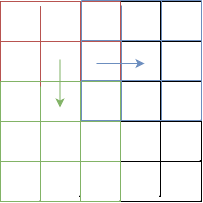

## Detector Layer
The detector layer simlpy apply the activation to a matrix component-wise. For 2-dimensional CNN, the detector layer is
$$
(\sigma(Y))_{i,j}=\sigma(Y_{i,j}).
$$
## Pooling Layer
This layer type is responsible for reducing the first two dimensions (height and width) and usually does not interfere with the third dimension (depth) of the data $M$ , but rather is **applied for all channels independently**. A pooling kayer has a filter size. For stride $s$ and padding $p$, the output dimsion is reduced to
$$
\left(\frac{n_1+2p-m}{s}+1\right)\times\left(\frac{n_2+2p-m}{s}+1\right). 
$$
Let
$$
M=
\left[
\begin{matrix}
1 & -1 & 7 & 3 \\
2 & 3 & 1 & 2 \\
3 & 1 & 2 & 9 \\
2 & 4 & 8 & -3 
\end{matrix}
\right].
$$
A **max pooling** with kernel size $2\times 2$, stride $s=2$ and padding $p=0$ gives us
$$
\left[
\begin{matrix}
1 & -1 & 7 & 3 \\
2 & 3 & 1 & 2 \\
3 & 1 & 2 & 9 \\
2 & 4 & 8 & -3 
\end{matrix}
\right]
\to
\left[
\begin{matrix}
3 & 7 \\
4 & 9
\end{matrix}
\right].
$$
Also, an **average pooling** outputs
$$
\left[
\begin{matrix}
1.25 & 0.75 \\
2.5 & 4
\end{matrix}
\right].
$$

## PyTorch Code
In this section, we build a CNN and test it with CIFAR10 dataset.

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Device configuration
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device)

mps


In [11]:
# Set hyperparameter
config = {
    'n_epoch':4,
    'batch_size':64,
    'lr':0.001,
}

In [10]:
# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

In [12]:
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
# There are 50000 training images and 10000 test images.

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
                                
test_set = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
                                       
train_loader = torch.utils.data.DataLoader(train_set, batch_size=config['batch_size'],shuffle=True)
                                          
test_loader = torch.utils.data.DataLoader(test_set, batch_size=config['batch_size'],shuffle=False)                                         

100%|██████████| 170498071/170498071 [00:11<00:00, 14501123.13it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [13]:
# class names
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In order to show the an imagem, we have to transpose the image first since in PyTorch Tensors, the number of channels is specified first but matplotlib only supports PIL images, i.e. images of shapes
- (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
- (M, N, 4): an image with RGBA values (0-1 float or 0-255 int), i.e. including transparency.

`np.transpose` has parameters
- a: an image
- axes: tuple or list of ints, optional

If specified, it must be a tuple or list which contains a permutation of [0,1,…,N-1] where N is the number of axes of a. The i’th axis of the returned array will correspond to the axis numbered `axes[i]` of the input.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


random index: tensor([20997])
Before transpose: (3, 32, 32)
After transpose: (32, 32, 3)


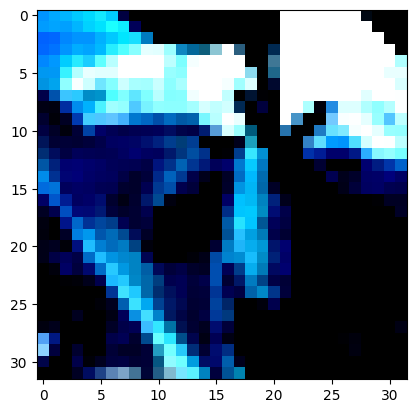

In [24]:
# 0 to 49999
# the comma , is necessary
random_index = torch.randint(0,50000,(1,)) 
print('random index:',random_index)

sample_img,sample_label = train_set[random_index]
sample_img = sample_img.numpy()                  
print('Before transpose:',sample_img.shape)      
print('After transpose:',np.transpose(sample_img, (1, 2, 0)).shape)
plt.imshow(np.transpose(sample_img, (1, 2, 0)))        

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layers = nn.Sequential(
            
        )